In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')

<IPython.core.display.Javascript object>


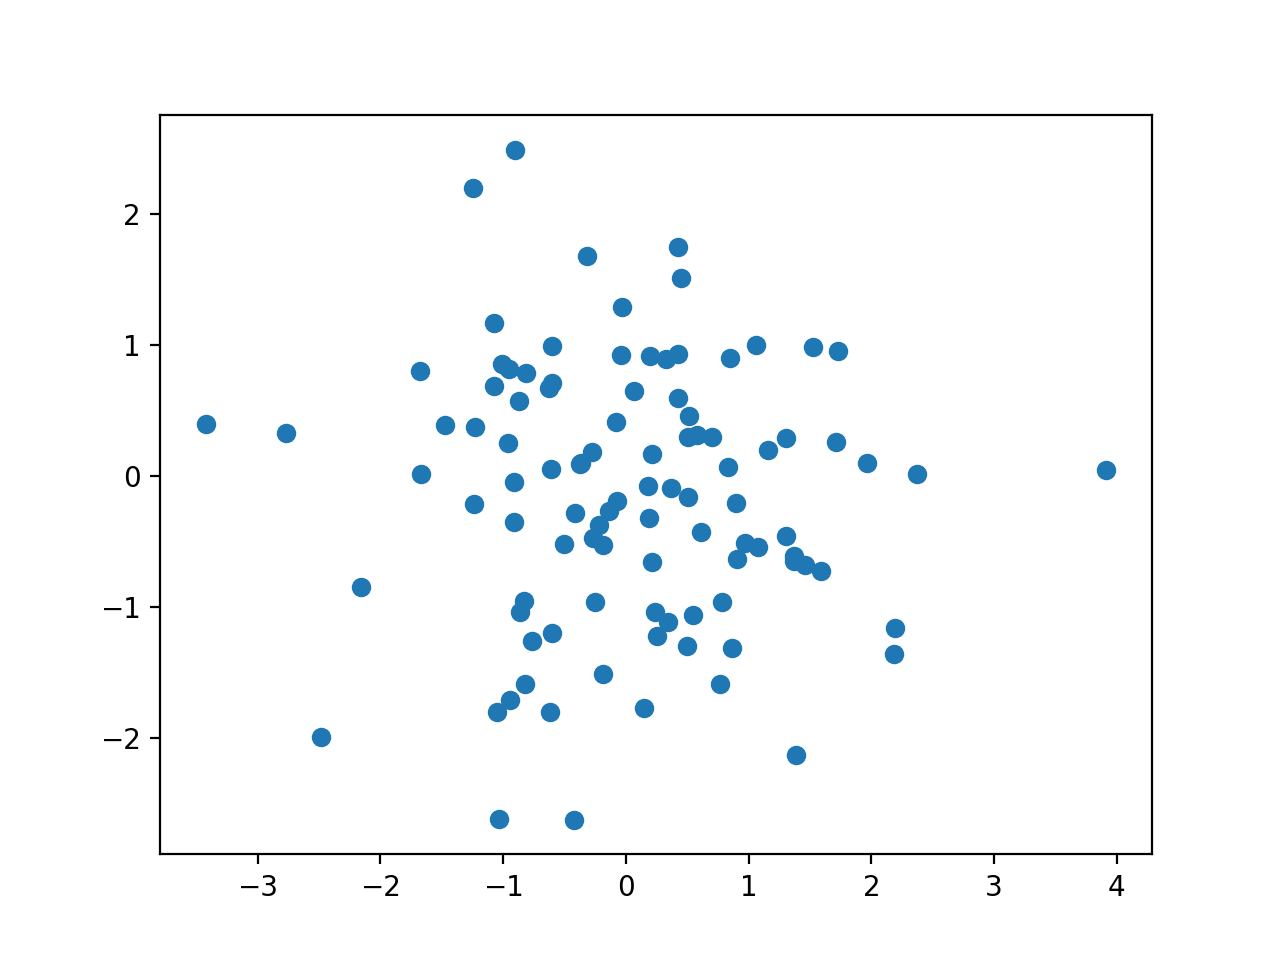

In [2]:
plt.scatter(np.random.randn(100), np.random.randn(100));

## Handling Mouse Buttons Events

In [3]:
def button_press_handler(event):
    if event.button == 1:
        sigma = 0.05
        n = 10
        xs = sigma * np.random.randn(n) + event.xdata
        ys = sigma * np.random.randn(n) + event.ydata
        plt.plot(xs, ys, 'bo')

<IPython.core.display.Javascript object>


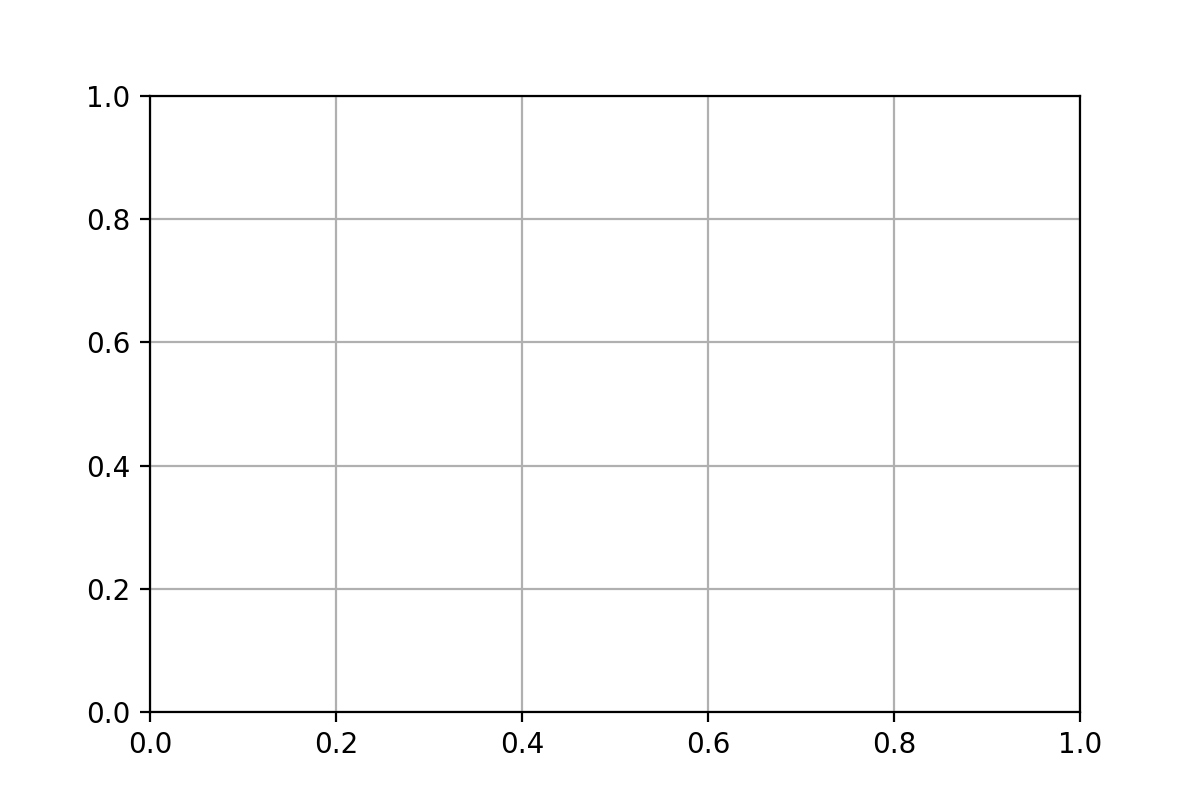

/Users/haolu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [4]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()
ax.grid('on')
# If we don't turn this off, the graph will go nuts scaling 
# itself nearly every time we add a few more points.
ax.set_autoscale_on(False)

# Connect the event listeners to the 
fig.canvas.mpl_connect('button_press_event', button_press_handler)

plt.show(fig)

## Ignoring Mouse Events Outside of Normal Mode

In [5]:
def button_press_handler(event):
    # Get the toolbar and make sure that we are not in zoom or pan mode. 
    # If we are, just exit without doing anything
    toolbar = plt.get_current_fig_manager().toolbar
    if toolbar.mode != "":
        pass
    elif event.button == 1:
        sigma = 0.05
        n = 10
        xs = sigma * np.random.randn(n) + event.xdata
        ys = sigma * np.random.randn(n) + event.ydata
        plt.plot(xs, ys, 'bo')

## Handling Key Press Events

In [6]:
def key_press_handler(event):
    if event.key.lower() == 'r':
        ax = plt.gca()
        xs = [x for l in ax.lines for x in l.get_xdata()]
        ys = [y for l in ax.lines for y in l.get_ydata()]
        m, b = np.polyfit(xs, ys, 1)
        xs = np.linspace(*plt.xlim(), num=2)
        plt.plot(xs, m*xs+b, 'r--')

Now, we just need to run the same code as we did above to create our plot, this time though, we'll connect both event handlers to their respective events. So, let's run it now and see how it works.

<IPython.core.display.Javascript object>


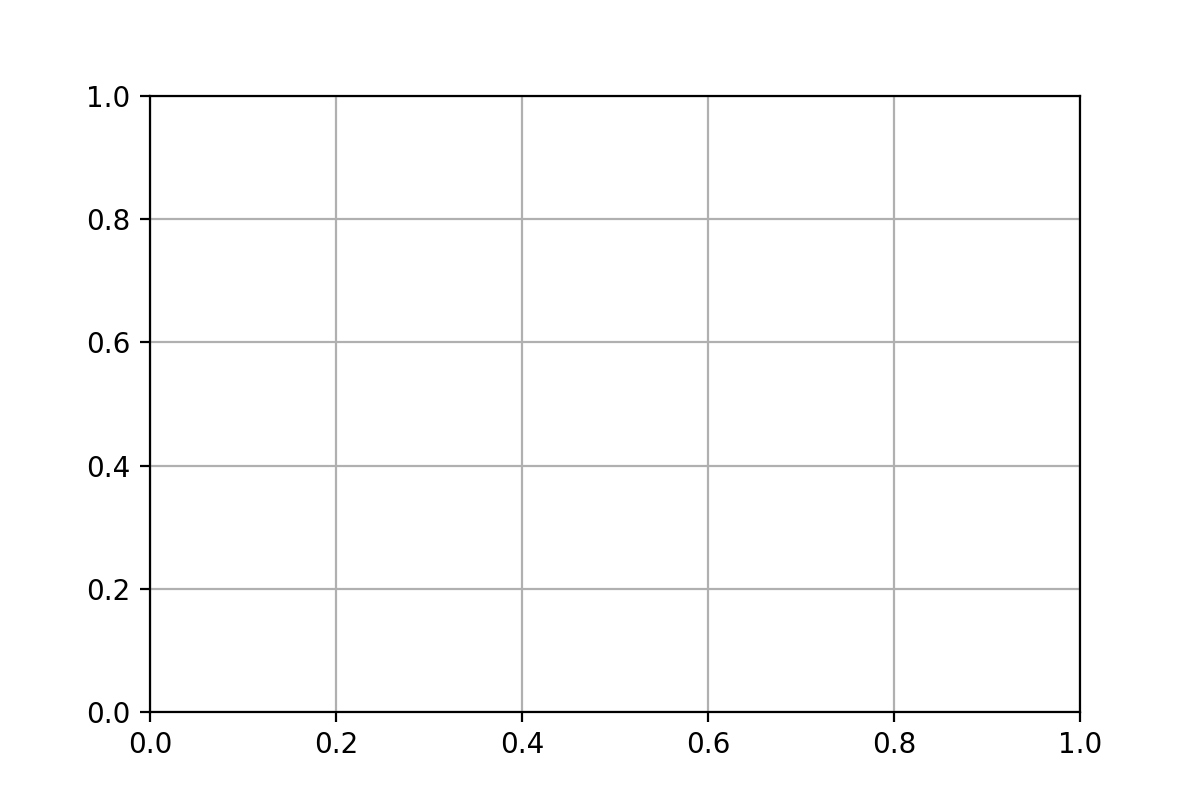

/Users/haolu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [7]:
fig = plt.figure(figsize=(6, 4))

ax = fig.gca()
ax.grid('on')
# If we don't turn this off, the graph will go nuts scaling 
# itself with the first couple of points chosen.
ax.set_autoscale_on(False)

# Connect the event listeners to the 
fig.canvas.mpl_connect('button_press_event', button_press_handler)
fig.canvas.mpl_connect('key_press_event', key_press_handler)

plt.show(fig)

In [8]:
# plt.close('all')